In [ ]:
pip install opencv-python==3.3.0.10 opencv-contrib-python==3.3.0.10

In [ ]:
#Importing all necessary librariesimport cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [ ]:
def plot_image(image_object,title=''):
    '''
    This function plots the image
    '''
    plt.imshow(image_object)
    plt.title(title,fontweight='bold')
    plt.show()

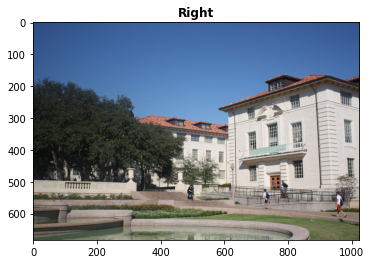

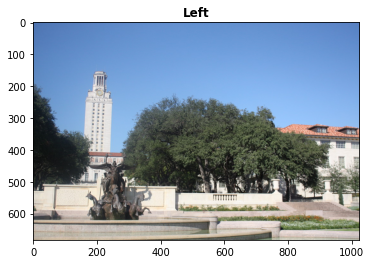

In [ ]:
#Photos Credits -  @Vegdevi Kommineni Blog 
#Link - towardsdatascience.com/image-stitching-using-opencv-817779c86a83

image1=mping.imread("right.jpg")
image2=mping.imread("left.jpg")

#Plotting the photos
plot_image(image1,"Right")
plot_image(image2,'Left')

In [ ]:
print("Shape of left image - ",image1.shape)
print("Shape of right image - ",image2.shape)

Shape of left image -  (683, 1024, 3)
Shape of right image -  (683, 1024, 3)


In [ ]:
#For stitching images, we need to match descriptors of the images 
#which can be done for gray-scale images as well

image1_gray = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [ ]:
#Determing keypoint and sift descriptors for both images for feature matching

sift = cv2.xfeatures2d.SIFT_create()
key_points1,des1 = sift.detectAndCompute(image1_gray,None)
key_points2,des2 = sift.detectAndCompute(image2_gray,None)

In [ ]:
#Matching descriptors of left and right images using KNN matcher which returns 
#K match-lines for each key point. Here using k = 2

bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)    #Top 2 matches for each descriptor

In [ ]:
#Determing good matches for stitching
good_matches=[]
for match in matches:
    if match[0].distance < 0.5*match[1].distance:
        good_matches.append(match)
matches = np.asarray(good_matches)

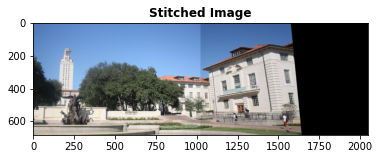

In [ ]:
#Stitching the images using homography matrix
#Taking atleast 4 good matches for tansformation as required

if len(matches[:,0])>=4:    #Taking atleast 4 good matches
    
    source = np.float32([key_points1[m.queryIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)
    destination = np.float32([key_points2[m.trainIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)
    #source = np.float32([key_points2[m.queryIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)
    #destination = np.float32([key_points1[m.trainIdx].pt for m in matches[:, 0]]).reshape(-1, 1, 2)
    h, mashed = cv2.findHomography(source,destination,cv2.RANSAC, 5.0)

    destination = cv2.warpPerspective(image1,h,(image2.shape[1] + image1.shape[1],image2.shape[0]))
    destination[0:image2.shape[0],0:image2.shape[1]] = image2

    cv2.imwrite('/Stitching.jpg',destination)
    #cv2.imshow(destination)
    plot_image(destination,"Stitched Image")
